In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import librosa
import IPython.display as ipd
from librosa.display import waveshow


## 2. Loading Data

In [2]:
CREME = './Data/AudioWAV/'
TESS = './Data/TESS Toronto emotional speech set data/'

In [3]:
import os

In [4]:
"1001_DFA_ANG_XX".split('_')

['1001', 'DFA', 'ANG', 'XX']

In [5]:
# loading CREME data, create list of emtions and path for audio files
emotion = []
path = []

for i in os.listdir(CREME):
    if i.split('_')[-2] == 'FEA':
        emotion.append('fear')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'ANG' :
        emotion.append('angry')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'DIS' :
        emotion.append('disgust')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'HAP' :
        emotion.append('happy')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'NEU' :
        emotion.append('neutral')
        path.append(CREME + i)
    elif i.split('_')[-2] == 'SAD' :
        emotion.append('sad')
        path.append(CREME + i)

# Converting it into dataFrame
emotions_df = pd.DataFrame(emotion, columns=["emotion"])
path_df = pd.DataFrame(path, columns=['path'])
creme_df = pd.concat([emotions_df, path_df], axis=1)

In [6]:
creme_df.head()

,emotion,path
0,angry,./Data/AudioWAV/1022_ITS_ANG_XX.wav
1,angry,./Data/AudioWAV/1037_ITS_ANG_XX.wav
2,neutral,./Data/AudioWAV/1060_ITS_NEU_XX.wav
3,neutral,./Data/AudioWAV/1075_ITS_NEU_XX.wav
4,disgust,./Data/AudioWAV/1073_IOM_DIS_XX.wav


In [7]:
emotion=[]
path=[]

for i in os.listdir(TESS):
    if(i == ".DS_Store"):
        continue
    for f in os.listdir(TESS + i):
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_disgust' or i == 'YAF_disgust' :
            emotion.append('disgust')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_Fear' or i == 'YAF_fear' :
            emotion.append('fear')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_happy' or i == 'YAF_happy' :
            emotion.append('happy')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_neutral' or i == 'YAF_neutral' :
            emotion.append('neutral')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_pleasant_surprise' or i == 'YAF_surprise' :
            emotion.append('surprise')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_angry' or i == 'YAF_angry' :
            emotion.append('angry')
            path.append(TESS + i + '/' + f)
        if i == 'OAF_Sad' or i == 'YAF_sad' :
            emotion.append('sad')
            path.append(TESS + i + '/' + f)
            
# creating dataframe
emotions_df = pd.DataFrame(emotion,columns = ['emotion'])
path_df = pd.DataFrame(path,columns = ['path'])
tess_df = pd.concat([emotions_df,path_df],axis = 1)

In [8]:
tess_df.head()

,emotion,path
0,disgust,./Data/TESS Toronto emotional speech set data/...
1,disgust,./Data/TESS Toronto emotional speech set data/...
2,disgust,./Data/TESS Toronto emotional speech set data/...
3,disgust,./Data/TESS Toronto emotional speech set data/...
4,disgust,./Data/TESS Toronto emotional speech set data/...


In [24]:
audio_df = pd.concat([creme_df, tess_df], axis=0)
audio_df.reset_index(drop = 'index',inplace = True)

audio_df.head()

,emotion,path
0,angry,./Data/AudioWAV/1022_ITS_ANG_XX.wav
1,angry,./Data/AudioWAV/1037_ITS_ANG_XX.wav
2,neutral,./Data/AudioWAV/1060_ITS_NEU_XX.wav
3,neutral,./Data/AudioWAV/1075_ITS_NEU_XX.wav
4,disgust,./Data/AudioWAV/1073_IOM_DIS_XX.wav


In [25]:
audio_df.shape

(10242, 2)

In [26]:
audio_df.value_counts(['emotion'])

emotion
angry      2071
disgust    1671
fear       1671
happy      1671
sad        1671
neutral    1487
dtype: int64

In [21]:
audio_df[audio_df['emotion'] == "angry"]

,emotion,path
0,angry,./Data/AudioWAV/1022_ITS_ANG_XX.wav
1,angry,./Data/AudioWAV/1037_ITS_ANG_XX.wav
17,angry,./Data/AudioWAV/1018_IWL_ANG_XX.wav
18,angry,./Data/AudioWAV/1059_IEO_ANG_MD.wav
21,angry,./Data/AudioWAV/1048_IEO_ANG_HI.wav
...,...,...
2595,angry,./Data/TESS Toronto emotional speech set data/...
2596,angry,./Data/TESS Toronto emotional speech set data/...
2597,angry,./Data/TESS Toronto emotional speech set data/...
2598,angry,./Data/TESS Toronto emotional speech set data/...


[]

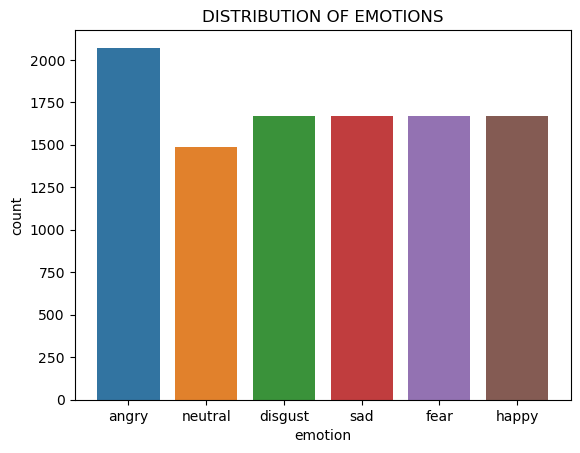

In [38]:
sns.countplot(data = audio_df,x= 'emotion')
plt.title('DISTRIBUTION OF EMOTIONS')
plt.plot()

## Buidling function to plot Spectrogram 

In [43]:
def audio_visual(path, emotion):
    data, sample_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    plt.title(f'Waveplot for {emotion}')
    waveshow(data)
    plt.show()


def spectogram(path):
    data , sample_rate = librosa.load(path)
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()


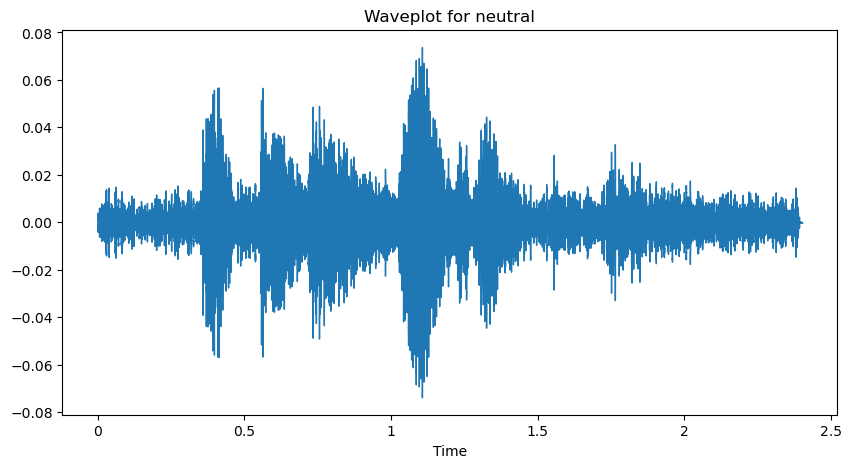

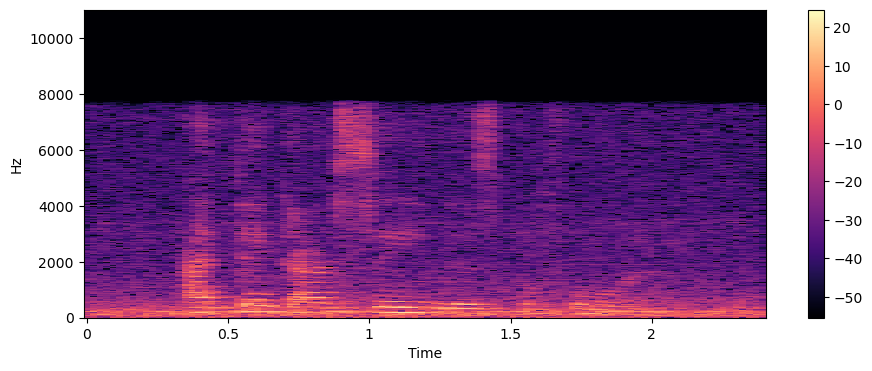

In [49]:
audio_visual(audio_df['path'][2], audio_df['emotion'][2])
spectogram(audio_df['path'][2])
ipd.Audio(audio_df['path'][2])